#### Business Objective: What was the impact of the COVID-19 pandemic on the level of home court advantage?
- Question 1: How has the difference in win-loss ratio between home and away teams changed from the 2019-20 season to the 2022-23 season? (wl_home and wl_away columns in game table)
- Question 2: How has the difference in average points scored between home and away teams changed from the 2019-20 season to the 2022-23 season? (pts_home and pts_away columns in game table)
- Question 3: How has the difference in offensive and defensive rebounds between home and away teams changed from 2019-20 to 2022-23?(oreb_home, oreb_away, dreb_home, dreb_away in the game table)
- Question 4: How does the average number of three-point field goals made by home teams compare to that of away teams from the 2019-20 season to the 2022-23 season? (fg3_pct_home and fg3_pct_away columns in game table)
- Question 5: How does the free throw percentage of home teams compare to that of away teams from the 2019-20 season to the 2022-23 season? (ft_pct_home and ft_pct_away in the game table)

In [2]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

con = sqlite3.connect(r"C:\Users\samar\OneDrive\Documents\GitHub\UMD-INST627-Fall2024\data\nba.sqlite")

Question 1

In [3]:
samples = pd.read_sql_query("SELECT * FROM game", con)

samples.head()

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
0,21946,1610610035,HUS,Toronto Huskies,0024600001,1946-11-01 00:00:00,HUS vs. NYK,L,0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,2,0,Regular Season
1,21946,1610610034,BOM,St. Louis Bombers,0024600003,1946-11-02 00:00:00,BOM vs. PIT,W,0,20.0,...,NaN,NaN,NaN,NaN,NaN,25.0,51.0,-5,0,Regular Season
2,21946,1610610032,PRO,Providence Steamrollers,0024600002,1946-11-02 00:00:00,PRO vs. BOS,W,0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,53.0,-6,0,Regular Season
3,21946,1610610025,CHS,Chicago Stags,0024600004,1946-11-02 00:00:00,CHS vs. NYK,W,0,21.0,...,NaN,NaN,NaN,NaN,NaN,22.0,47.0,-16,0,Regular Season
4,21946,1610610028,DEF,Detroit Falcons,0024600005,1946-11-02 00:00:00,DEF vs. WAS,L,0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,50.0,17,0,Regular Season


Intro: During the COVID-19 pandemic, the world came to a stand still. People were locked in their houses, remote work had set-in, and Americans' boredome levels hit a new peak. It was time for our trusty stead, the National Basketball Association to put a stop to this standstill, and bring us some much needed entertainment. So, our mighty heroes - the NBA players, set out to play games for us despite the deadly threat of the virus. This meant that they had to play and practice with extreme caution, isolating themselves into little COVID-bubbles. But now we're wondering - won't this have an impact on the players' practice, and thus the game? Can our ballers play just as well in empty courts without our support? What impact will COVID have on the level of Home Court Advantage?


Rising Action: We received a dataset, which has rich data about NBA games. This will let us actually compare the result of games that took place during the COVID years, just before COVID and right after COVID. So when exactly was this? We're talking about the seasons-
2019
2020
2021
2022
Now, we can calculate the win-loss ratio per team of games that took place in the 2019-20 season, all the way up till the most recent 2022-23 season. That's going to help us get a sense of whether all the intense within-one-bubble training made our players perform better at home, or in away games. 

In [4]:
home_games = pd.read_sql_query("SELECT wl_home, season_id FROM game WHERE (season_id BETWEEN '22019' AND '22022')", con)

home_games['wl_home'] = home_games['wl_home'].str.replace("W", "1")
home_games['wl_home'] = home_games['wl_home'].str.replace("L", "0")
home_games['wl_home'] = home_games['wl_home'].astype(float)

print(home_games.groupby('season_id')['wl_home'].value_counts(normalize=True))

season_id  wl_home
22019      1.0        0.551464
           0.0        0.448536
22020      1.0        0.543519
           0.0        0.456481
22021      1.0        0.543902
           0.0        0.456098
22022      1.0        0.580488
           0.0        0.419512
Name: proportion, dtype: float64


C:\Users\samar\AppData\Local\Temp\ipykernel_21336\3636684171.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(data = home_games, x='season_id', y='wl_home', palette=['#1D428A', '#C8102E'])
C:\Users\samar\AppData\Local\Temp\ipykernel_21336\3636684171.py:4: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  g = sns.barplot(data = home_games, x='season_id', y='wl_home', palette=['#1D428A', '#C8102E'])
C:\Users\samar\AppData\Local\Temp\ipykernel_21336\3636684171.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(["2019", "2020", "2021", "2022"])


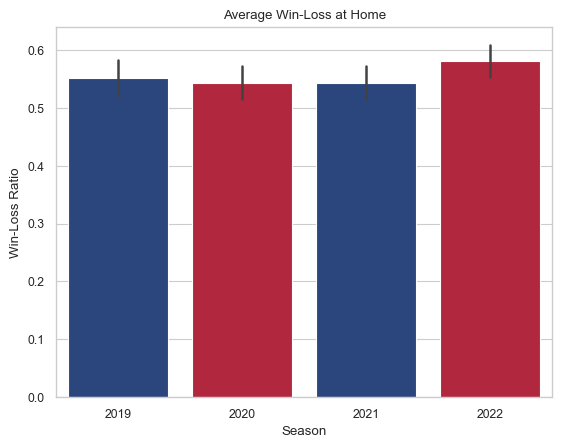

In [64]:
sns.set_context('paper')


g = sns.barplot(data = home_games, x='season_id', y='wl_home', palette=['#1D428A', '#C8102E'])
g.set(xlabel="Season", ylabel="Win-Loss Ratio")
g.set_title("Average Win-Loss at Home")

g.set_xticklabels(["2019", "2020", "2021", "2022"])
plt.show()

C:\Users\samar\AppData\Local\Temp\ipykernel_21336\2710595007.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(data = away_games, x='season_id', y='wl_away', palette=['#1D428A', '#C8102E'])
C:\Users\samar\AppData\Local\Temp\ipykernel_21336\2710595007.py:10: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  g = sns.barplot(data = away_games, x='season_id', y='wl_away', palette=['#1D428A', '#C8102E'])
C:\Users\samar\AppData\Local\Temp\ipykernel_21336\2710595007.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(["2019", "2020", "2021", "2022"])


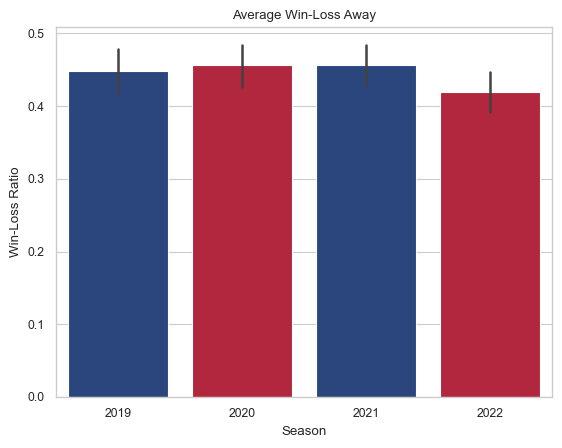

In [65]:
away_games = pd.read_sql_query("SELECT wl_away, season_id FROM game WHERE (season_id BETWEEN '22019' AND '22022')", con)

away_games['wl_away'] = away_games['wl_away'].str.replace("W", "1")
away_games['wl_away'] = away_games['wl_away'].str.replace("L", "0")
away_games['wl_away'] = away_games['wl_away'].astype(float)

sns.set_context('paper')


g = sns.barplot(data = away_games, x='season_id', y='wl_away', palette=['#1D428A', '#C8102E'])
g.set(xlabel="Season", ylabel="Win-Loss Ratio")
g.set_title("Average Win-Loss Away")

g.set_xticklabels(["2019", "2020", "2021", "2022"])
plt.show()

Climax: The year 2022 saw an INCREASE in the average win-loss ratio for home games by nearly 4%! But away games, on the other hand, saw almost a 4% DECREASE in the win-loss ratio. Could this mean that the players did better when the crowds came back into the games?  

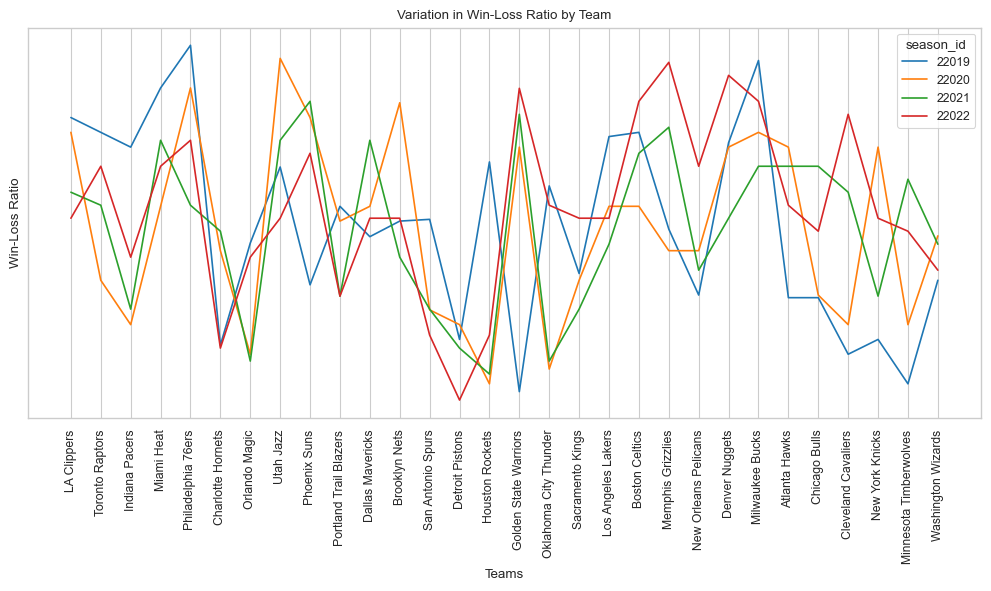

In [6]:
team_games = pd.read_sql_query("SELECT wl_home, season_id, team_name_home FROM game WHERE (season_id BETWEEN '22019' AND '22022')", con)

team_games.groupby('wl_home')['team_name_home'].value_counts(normalize=True)

sns.set_style("whitegrid") 
sns.set_context('paper')
plt.figure(figsize=(10, 6))
g = sns.lineplot(data=team_games, x='team_name_home', y='wl_home', hue='season_id', errorbar=None)
g.set_title("Variation in Win-Loss Ratio by Team")
plt.xticks(rotation=90)
g.set(xlabel="Teams", ylabel="Win-Loss Ratio")
plt.tight_layout()
plt.show()

Conclusion: Seeing that win-loss ratios at home or away vary based on the teams, so we cannot conclude based on win-loss ratio changes that home-court advantage was impacted by the consequences of the pandemic.

Question 2

Intro: Let's investigate further. Win-loss ratios are harder to plot patterns with, given that everytime there is an increment to one team's win-loss ratio, their opponent's win-loss ration decreases. Instead, we try to measure the overall points scored per game, and compare the average points scored during home and away games.

Rising action: We calculate the mean points scored in home games, then away games. If there's a significant difference betweeen home and away games, the data would tell us that there's an impact on homecrowd advantage in the COVID seasons.

In [21]:
avg_pts = pd.read_sql_query("SELECT pts_away AS 'avg_away_pts', season_id, pts_home AS 'avg_home_pts' FROM game WHERE (season_id BETWEEN '22019' AND '22022')", con)

#print("Average Points scored home during the 2019 season: ", avg_pts['avg_home_pts'].iloc[0])
#print("Average Points scored away during the 2019 season: ", avg_pts['avg_away_pts'].iloc[0])

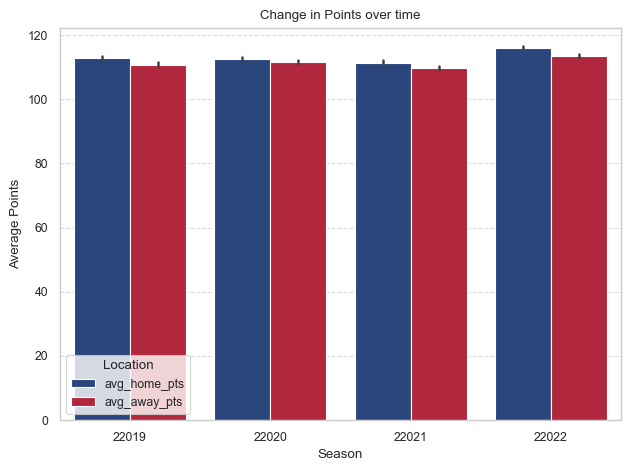

In [35]:
season_labels = {
    '22019': '2019',
    '22020': '2020',
    '22021': '2021',
    '22022': '2022'
}
avg_pts_clean = avg_pts.copy()
avg_pts_clean['season_id'] = avg_pts_clean['season_id'].map(season_labels)
avg_pts_long = avg_pts.melt(id_vars=['season_id'], 
                           value_vars=['avg_home_pts', 'avg_away_pts'],
                           var_name='Location', 
                           value_name='Points')


sns.set_style('whitegrid')

g = sns.barplot(data=avg_pts_long, 
            x='season_id', 
            y='Points',
            hue='Location',
            palette=['#1D428A', '#C8102E'])
#g = sns.barplot(data=avg_pts, x='season_id', y='avg_home_pts')
g.set_title('Change in Points over time')

plt.xlabel('Season')
plt.xticks(rotation=0)
plt.ylabel('Average Points')

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

Climax: There is a clear difference in points scored at home and away games. Teams have scored higher during home games, and the most recent season has the highest average home points. 

Falling action: By taking a closer look at the distribution of points scored, we cam see that average points scored at home and away BOTH decreased in 2020 when COVID peaked. We're now seeing stronger evidence that COVID may in fact had an impact on scoring patterns of most teams, and this could be a potential cause for homecourt advantage being a major factor.

Conclusion: The effect of homecourt advantage is possibly seen only when matches were played in front of a crowd.

In [34]:
print("Difference in home and away points averages increased by ", (avg_home_2022['avg_pts'].iloc[0]-avg_away_2022['avg_pts'].iloc[0]) - (avg_home_2019['avg_pts'].iloc[0] - avg_away_2019['avg_pts'].iloc[0]), "points since the 2019-20 season.")

Difference in home and away points averages increased by  1.5564814814814838 points since the 2019-20 season.


Question 3

Intro: Homecourt advantage may also be indicated by how many rebounds you collect in home vs away games. If playing in your homecourt is indeed an advantage, you should ideally have better possession of the ball and thus more rebounds overall in home games.

Rising Action: We'll measure the average rebounds at home, in away games, in two categories - offensive and defensive. 

In [37]:
rebounds = pd.read_sql_query("SELECT season_id, oreb_home, oreb_away, dreb_home, dreb_away FROM game WHERE season_id BETWEEN '22019' AND '22022';", con)

rebounds['home_diff'] = rebounds['dreb_home'] - rebounds['oreb_home']
rebounds['away_diff'] = rebounds['dreb_away'] - rebounds['oreb_away']

season_stats_diff = rebounds.groupby('season_id').agg({
    'home_diff': 'mean',
    'away_diff': 'mean'
})

season_stats_diff.describe()



,home_diff,away_diff
count,4.000000,4.000000
mean,24.230507,23.605931
std,0.970944,1.014702
min,22.952846,22.185366
25%,23.737602,23.219512
50%,24.470427,23.950197
75%,24.963332,24.336615
max,25.028329,24.337963


Climax: Average defensive rebounds are much higher than offensive rebounds at home and away games alike. However, COVID does not seem to have any effect on possession.

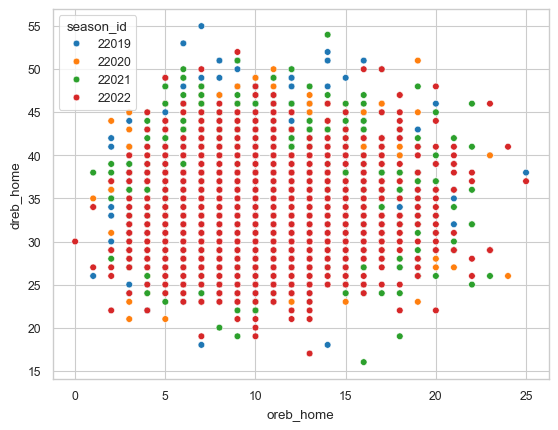

<Figure size 1200x700 with 0 Axes>

In [67]:
sns.scatterplot(data=rebounds, x = 'oreb_home', y = 'dreb_home', hue='season_id')
plt.figure(figsize=(12, 7))
plt.show()

Falling Action: We take a closer look at descriptive statistics to identify patterns in the data that suggest any spikes or significant changes or patterns.

Conclusion: The number of rebounds seems to have no relationship with home court advantage. Offensive rebounds are far fewer than defensive rebounds.

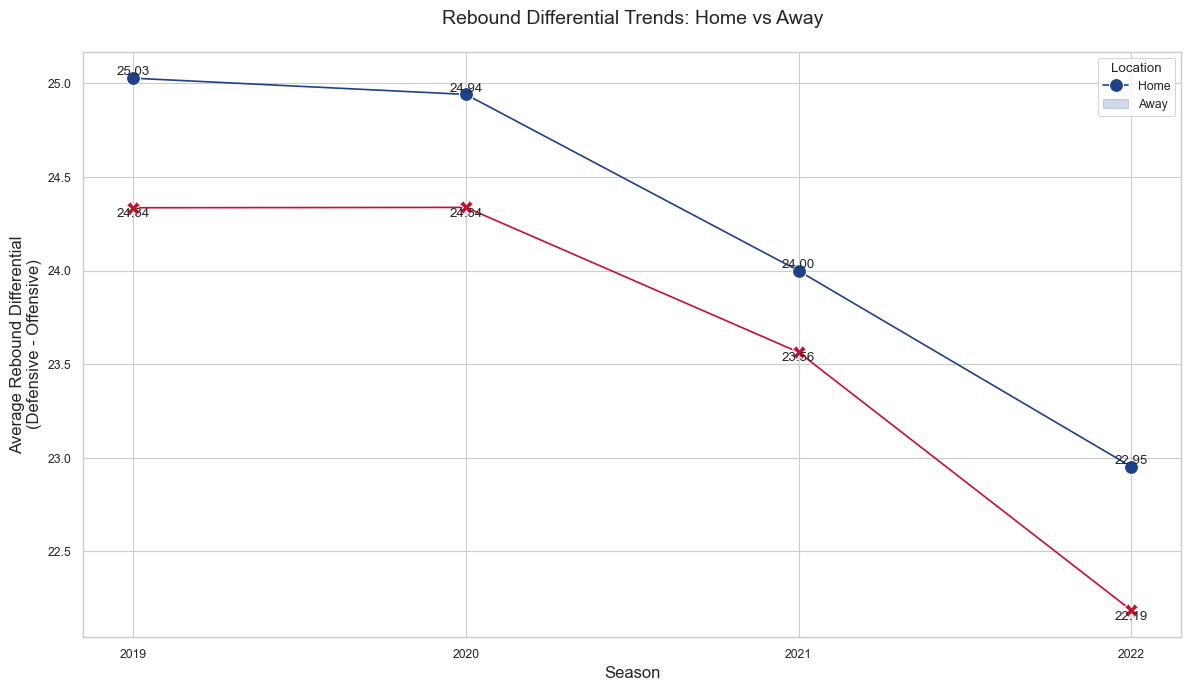

In [61]:
season_labels = {
    '22019': '2019',
    '22020': '2020',
    '22021': '2021',
    '22022': '2022'
}

plot_data = season_stats_diff.reset_index()
plot_data['season_id'] = plot_data['season_id'].map(season_labels)

plot_data_long = plot_data.melt(id_vars=['season_id'], 
                               value_vars=['home_diff', 'away_diff'],
                               var_name='Location', 
                               value_name='Differential')

sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

sns.lineplot(data=plot_data_long, 
            x='season_id', 
            y='Differential',
            hue='Location',
            style='Location',
            markers=True,
            dashes=False,
            markersize=10, palette=['#1D428A', '#C8102E'])

for idx, row in plot_data.iterrows():
    plt.text(row['season_id'], row['home_diff'], f'{row["home_diff"]:.2f}', 
             ha='center', va='bottom')
    plt.text(row['season_id'], row['away_diff'], f'{row["away_diff"]:.2f}', 
             ha='center', va='top')

plt.title('Rebound Differential Trends: Home vs Away', 
          fontsize=14, pad=20)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Rebound Differential\n(Defensive - Offensive)', fontsize=12)

plt.legend(title='Location',
          labels=['Home', 'Away'])

plt.tight_layout()
plt.show()

Question 4

Intro: Shooting deep earns you more points, and more 3 pointer field goals equals higher chances of winning. Let's put this to the test. 

Rising Action: We calculate the interquartile range to get a sense of distribution of three-pointer shots. This will help us understand how 

In [43]:
av3 = pd.read_sql_query("SELECT fg3_pct_home AS 'p3_home', season_id, fg3_pct_away AS 'p3_away' FROM game WHERE season_id BETWEEN '22019' AND '22022';", con)

Q1_home = av3['p3_home'].quantile(0.25)
Q3_home = av3['p3_home'].quantile(0.75)
IQR_home = Q3_home - Q1_home

Q1_away = av3['p3_away'].quantile(0.25)
Q3_away = av3['p3_away'].quantile(0.75)
IQR_away = Q3_away - Q1_away

print("average 3 pointer percentage at home:", av3['p3_home'].mean())
print("average 3 pointer percentage away:", av3['p3_away'].mean())
print("IQR for p3_home: ", IQR_home)
print("IQR for p3_away: ", IQR_away)

average 3 pointer percentage at home: 0.36220352250489235
average 3 pointer percentage away: 0.3551515546858013
IQR for p3_home:  0.11499999999999999
IQR for p3_away:  0.11499999999999999


Climax: The interquartile range is the same for home and away games alike, which perhaps suggests that there is no relationship to seasons, or COVID bubbles.

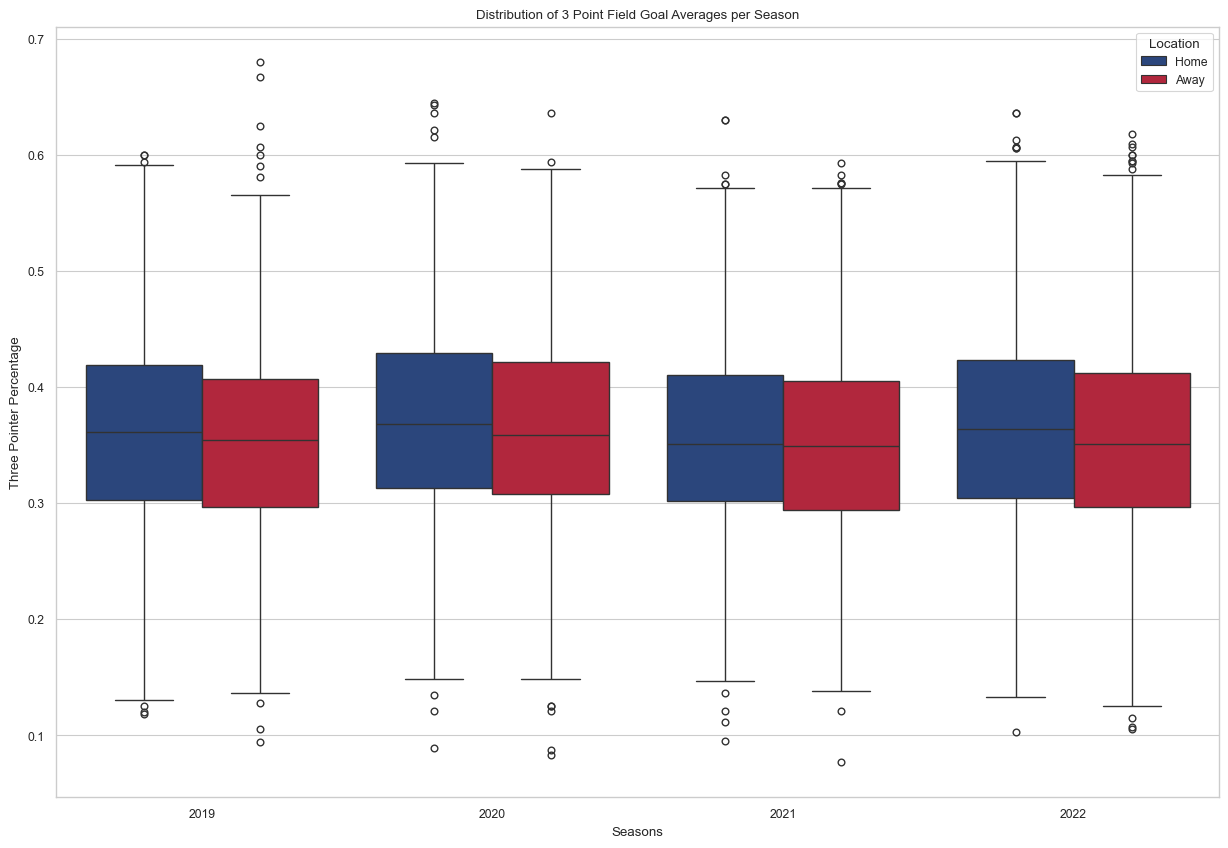

In [62]:
season_labels = {
    '22019': '2019',
    '22020': '2020',
    '22021': '2021',
    '22022': '2022'
}
fig = plt.figure(figsize=(15, 10))

av3_long = av3.melt(id_vars=['season_id'], 
                    value_vars=['p3_home', 'p3_away'],
                    var_name='Location', 
                    value_name='3P%')
av3_long['season_id'] = av3_long['season_id'].map(season_labels)
av3_long['Location'] = av3_long['Location'].map({'p3_home': 'Home', 'p3_away': 'Away'})


g=sns.boxplot(data=av3_long, x='season_id', y='3P%', hue='Location', palette=['#1D428A', '#C8102E'])
g.set_xlabel("Seasons")
g.set_ylabel("Three Pointer Percentage")

g.set_title('Distribution of 3 Point Field Goal Averages per Season')
plt.show()

Falling Action: The boxplot shows that while the interquartile range is relatively small, there are some outliers suggesting the inconcistencies in shooting 3 pointer field goals.

Conclusion: There is no relation between COVID bubbles and shooting three-pointers.

Question 5

Intro: Imagine you're an NBA star, about to take a free throw shot. Having an entire crowd holding their breath in anticipation is bound to distract you, no matter how much you may have trained to shoot the perfect free throw. 

Rising action: We now measure the average free throw percentage in home games, away games and compare them across each season. 

In [56]:
free_throw = pd.read_sql_query("SELECT season_id, ft_pct_home AS 'ft_home', ft_pct_away AS 'ft_away' FROM game WHERE season_id BETWEEN '22019' AND '22022';", con)


free_throw['ft_diff'] = free_throw['ft_home'] - free_throw['ft_away']

diff_stats = free_throw.groupby('season_id')['ft_diff'].agg(['mean', 'median', 'std', 'min', 'max'])

print(diff_stats)

               mean  median       std    min    max
season_id                                          
22019     -0.001795  0.0050  0.140779 -0.462  0.571
22020      0.002143 -0.0055  0.144944 -0.417  0.542
22021     -0.000536  0.0005  0.142385 -0.435  0.482
22022      0.001827  0.0000  0.136905 -0.480  0.575


Text(0, 0.5, 'Free Throw Percentage')

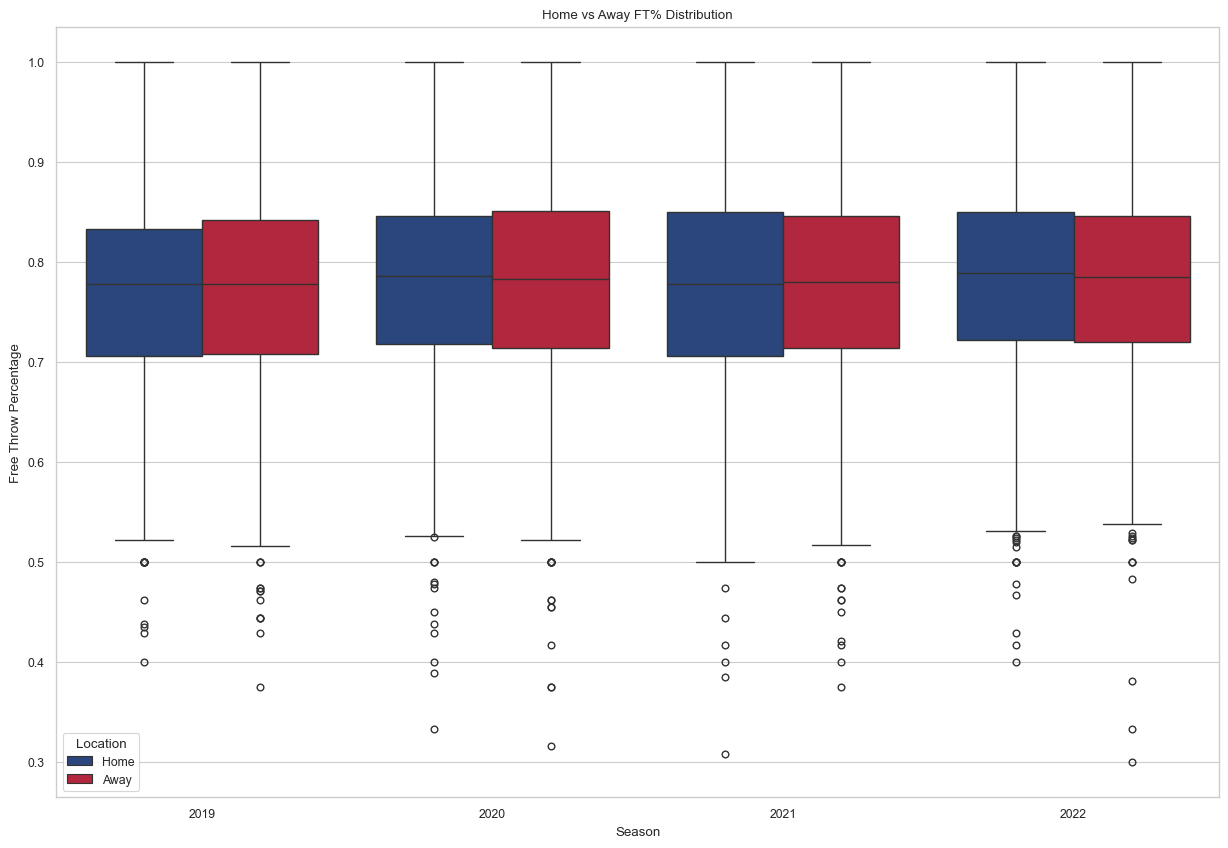

In [63]:
season_labels = {
    '22019': '2019',
    '22020': '2020',
    '22021': '2021',
    '22022': '2022'
}


fig = plt.figure(figsize=(15, 10))

ft_long = free_throw.melt(id_vars=['season_id'], 
                         value_vars=['ft_home', 'ft_away'],
                         var_name='Location', 
                         value_name='FT%')

ft_long['season_id'] = ft_long['season_id'].map(season_labels)

ft_long['Location'] = ft_long['Location'].map({'ft_home': 'Home', 'ft_away': 'Away'})
sns.boxplot(data=ft_long, x='season_id', y='FT%', hue='Location', palette=['#1D428A', '#C8102E'])
plt.title('Home vs Away FT% Distribution')
plt.xlabel('Season')
plt.ylabel('Free Throw Percentage')

Climax: While the means were very closely related, the ranges of freethrows made vary greatly. Free throws at home were made more often in 2019 when home crowds were present, than in 2020 when they were not. 

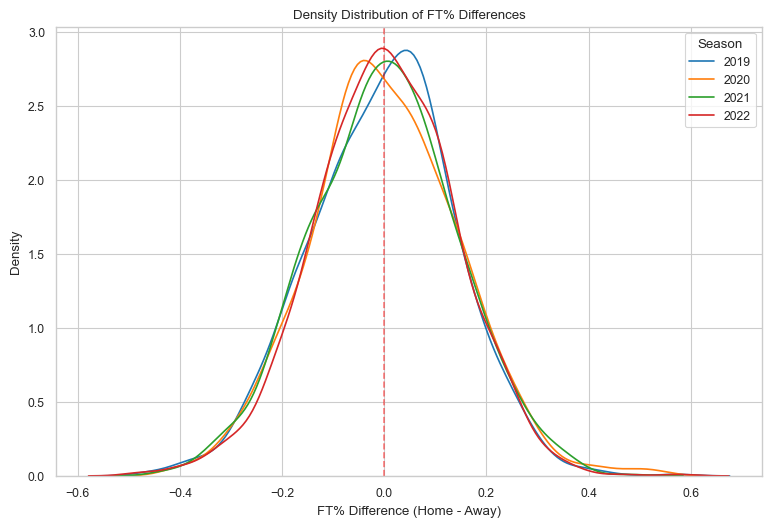

In [70]:
season_labels = {
    '22019': '2019',
    '22020': '2020',
    '22021': '2021',
    '22022': '2022'
}

fig = plt.figure(figsize=(15, 10))

free_throw['season_id'] = free_throw['season_id'].map(season_labels)
plt.subplot(2, 2, 4)
for season in free_throw['season_id'].unique():
    season_data = free_throw[free_throw['season_id'] == season]['ft_diff']
    sns.kdeplot(data=season_data, label=season)
plt.axvline(x=0, color='r', linestyle='--', alpha=0.5)
plt.title('Density Distribution of FT% Differences')
plt.xlabel('FT% Difference (Home - Away)')
plt.ylabel('Density')
plt.legend(title='Season')

plt.tight_layout()
plt.show()

Falling action: It is probable that there is a relationship between free throws and the presence of a crowd. As we see in the KDE plot above, the 2020 season impacted by COVID had the lowest density of Free Throw differences, suggesting a more level playing field irrespective of home or away games. Season 2019, just before COVID hit indicates a higher density of free throw difference, with home teams scoring a significantly higher amount of free throws.

Conclusion: Creating a heatmap or relational plot, and collecting more data about free-throws after COVID will help us strategize on how to leverage home court advantage.

In [ ]:
con.close()